# Loss Functions
> Loss Functions used in Machine Learning and Deep Learning

- toc: true 
- badges: true
- comments: true
- categories: [AI/ML, jupyter]
- image: images/loss_function.png

# About

A Loss Function is a function that calculates a single real number which indicates how far a prediction is from the actual. During the creation of a Machine Learning model the loss is minimised by using some type of algorithm also known as an Optimiser. The Optimiser optimises the result by reducing the loss. In general, the loss is calculated over a number of input examples (batch).


## Tutorial Overiew

[JASON BROWNLEE MACHINE LEARNING MASTERY](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)

This tutorial is divided into three parts; they are:

Regression Loss Functions

**Mean Squared Error Loss** - default - distribution of target is gaussian - square of error means larger errors penalised more than smaller ones (Keras mse or mean_squared_error)

**Mean Squared Logarithmic Error Loss**

**Mean Absolute Error Loss** - distribution of target variable is mainly gaussian but may heave outliers (keras - mean_absolute_error)

**Binary Classification Loss Functions** - targets are either of two labels

**Binary Cross-Entropy (keras - binary_cross_entropy)

**Hinge Loss - for use with SVM**  - binay classification where target values are in the set {-1,1}
encourages examples to have the correct sign - assigning more errorwhen thee is a differene in sign between actual/predicted class values

**Squared Hinge Loss** - square of hinge loss - hass effect of smoothing the surfaceof the error function and making it easier to work with numerically


**Multi-Class Classification Loss Functions** - targets can belong to one of many labels or classes - predict probability of example beloging to each known class

**Multi-Class Cross-Entropy Loss** - use this first - calculate a score that summarizes the ave diff between actual and predicted probability distributions  for all classes - keras -categorical_cross_entropy

**Sparse Multiclass Cross-Entropy Loss** - large nb of labels- eg words in a vocabulary may have tens or hundreds of thousands of categories, one for each label. No one-hot encoding 
keras - sparse_categorical_crossentropy

**Kullback Leibler Divergence Loss KL divergence** - measure of how one probability distribution differs from a baseline distribution KLdiv of 0 suggest distributions are identical
calculates how much information is lost if the predicted target distributon is use to approximate the desired target probablity distribuion
KLd more commonly used when using models that learn to approximate a more complex fn than simply multi-class ie autoencoding used for learning a dense feature representation under a model that must construct the original input


## Regression loss functions

In [3]:
#'/Users/dexterdsilva/Documents/Developer/MachineLearning/brownlee_mlm'

import os
os.path.abspath('')

'/Users/dexterdsilva/Documents/Developer/MachineLearning/brownlee_mlm'

In [4]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [5]:
import keras
print(keras.__version__)
import tensorflow as tf
print(tf.__version__)

2.3.1
2.1.0


In [6]:
#generate regression dataset
#20 
X,y=make_regression(n_samples=1000, n_features=20,noise=0.1,
                   random_state=1)

In [7]:
X[0]

array([ 0.58372668,  0.78593639, -0.17187155,  0.66928708,  1.67181016,
        0.59831823,  1.49807611,  0.27925069, -0.31705821, -0.41961259,
       -0.21796143,  0.81186707, -0.79215259,  0.56621046,  0.97473625,
       -0.8223744 ,  1.03007179, -0.67945508, -0.21540618,  1.03118947])

In [8]:
print(y.shape)
f'{y[0]}'
print(type(y))

(1000,)
<class 'numpy.ndarray'>


In [9]:
X=StandardScaler().fit_transform(X)

In [10]:
X[0]

array([ 0.64516745,  0.76000873, -0.18010938,  0.65740427,  1.65197553,
        0.56574009,  1.50368462,  0.30416606, -0.29634854, -0.37041198,
       -0.22745535,  0.72392625, -0.76421488,  0.55675061,  0.96630152,
       -0.82406123,  0.95038766, -0.76479647, -0.2088517 ,  1.04702956])

In [11]:
y=StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

In [12]:
n_train=500
trainX, testX = X[:n_train,:], X[n_train:,:]
trainy, testy = y[:n_train], y[n_train:]

In [13]:
model= Sequential()
model.add(Dense(25, input_dim=20,activation='relu',
               kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

In [14]:
opt=SGD(lr=0.01, momentum=0.9)

## Mean Squared Error Loss

In [15]:
model.compile(loss='mse', optimizer = opt)

In [16]:
h=model.fit(trainX, trainy, validation_data=(testX,testy),
           epochs=100,
           verbose=0)

In [17]:
h.history.keys()

dict_keys(['val_loss', 'loss'])

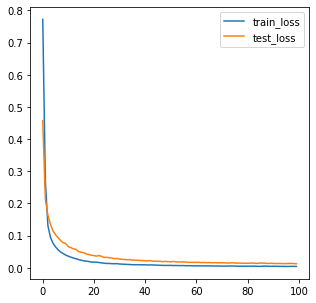

In [18]:
fig= plt.figure(figsize=(5,5))
plt.plot(h.history['loss'],label='train_loss')
plt.plot(h.history['val_loss'], label='test_loss')
plt.legend()
plt.show()

## Mean Squared Logarithmic Error Loss

In [31]:
model=Sequential()
model.add(Dense(25, input_dim=20, activation ='relu',
               kernel_initializer = 'he_uniform'))
model.add(Dense(1, activation = 'linear'))
opt=SGD(lr=0.1, momentum=0.9)
model.compile(loss='mean_squared_logarithmic_error',
             optimizer=opt,
             metrics=['mse'])


In [32]:
print(trainX.shape,'   ',trainy.shape,'  ', testX.shape,' ', testy.shape)

(500, 20)     (500,)    (500, 20)   (500,)


In [33]:
h = model.fit(trainX, trainy,
              validation_data=(testX, testy),
             epochs=200,
              verbose=0)

In [34]:
# evaluate the model
_,train_mse=model.evaluate(trainX, trainy, verbose=0)
_,test_mse=model.evaluate(testX, testy, verbose=0)

In [35]:
print('Train: {:.2f} Test {:.2f}'.format(train_mse, test_mse))

Train: 0.31 Test 0.37


In [36]:
h.history.keys()

dict_keys(['val_loss', 'val_mse', 'loss', 'mse'])

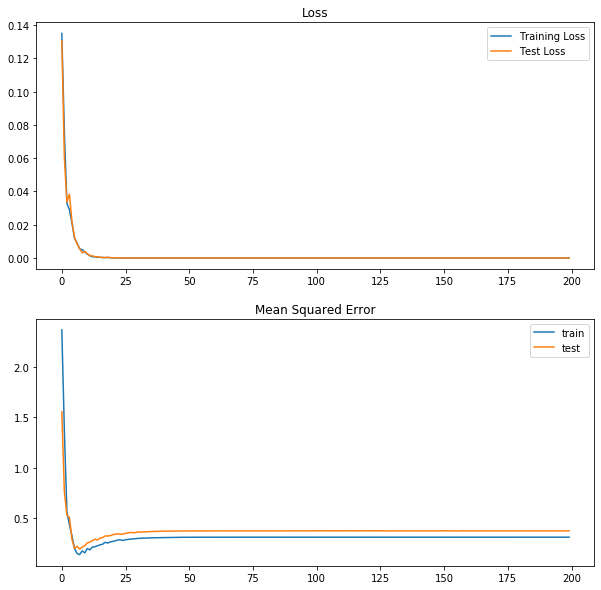

In [37]:
fig=plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('Loss')
plt.plot(h.history['loss'],label='Training Loss')
plt.plot(h.history['val_loss'],label = 'Test Loss')
plt.legend()
plt.subplot(212)
plt.title('Mean Squared Error')
plt.plot(h.history['mse'], label='train')
plt.plot(h.history['val_mse'], label='test')
plt.legend()
plt.show()


## Mean Absolute Error Loss

In [40]:
X,y=make_regression(n_samples=1000, n_features=20,
                   noise=0.1, random_state=1)

(1000, 20) (1000,)    <class 'numpy.ndarray'>


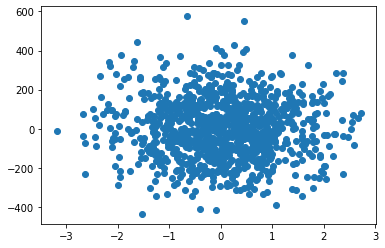

In [41]:
print(X.shape, y.shape,'  ', type(y))
plt.scatter(X[:,1],y)

In [42]:
len(y)

1000

In [43]:
X=StandardScaler().fit_transform(X)
y=StandardScaler().fit_transform(y.reshape(len(y),1))

In [44]:
n_train=500
trainX, testX = X[:n_train,:],X[n_train:,:]
trainy, testy = y[:n_train], y[n_train:]

In [45]:
model= Sequential()
model.add(Dense(25,input_dim=20, 
                activation='relu',
               kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt=SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_absolute_error', optimizer=opt,metrics=['mse'])

In [ ]:
h=model.fit(trainX, trainy,validation_data=(testX, testy),
            epochs=100, verbose=1)

In [47]:
_,train_mse=model.evaluate(trainX, trainy, verbose=1)

500/500 [==============================] - 0s 18us/step


In [48]:
_,test_mse=model.evaluate(testX, testy, verbose=1)

500/500 [==============================] - 0s 19us/step


In [49]:
h.history.keys()

dict_keys(['val_loss', 'val_mse', 'loss', 'mse'])

In [50]:
print('Train: {:.4f}  Test:{:.4f}'.format(train_mse, test_mse))

Train: 0.0042  Test:0.0036


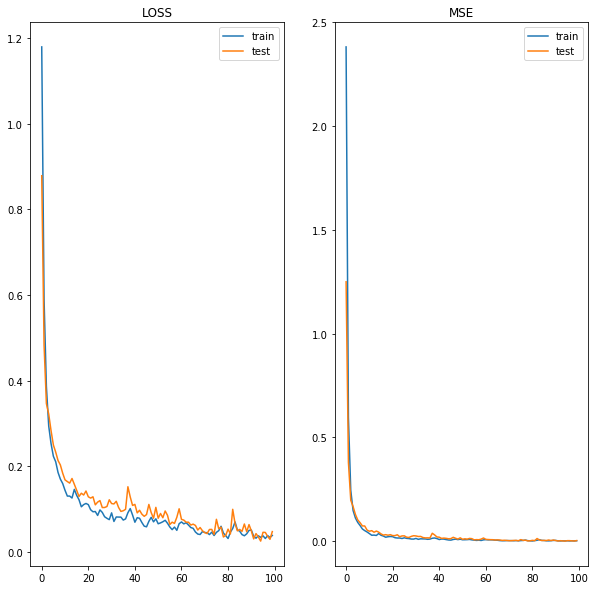

In [51]:
fig=plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('LOSS')
plt.plot(h.history['loss'], label='train')
plt.plot(h.history['val_loss'], label='test')
plt.legend()
plt.subplot(122)
plt.title('MSE')
plt.plot(h.history['mse'],label='train')
plt.plot(h.history['val_mse'], label='test')
plt.legend()
plt.show()

## Classification Loss Functions

In [52]:
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from numpy import where
import matplotlib.pyplot as plt
%matplotlib inline

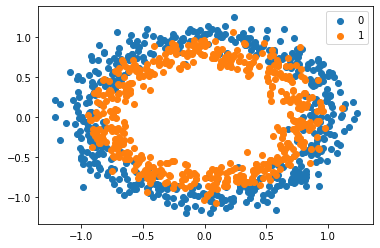

In [53]:
X,y = make_circles(n_samples=1000,noise=0.1, random_state=1)
for i in range(2):
    samples_idx= where(y==i)
    plt.scatter(X[samples_idx,0], X[samples_idx,1], label=str(i))

plt.legend()
plt.show()

In [54]:
print(X[:5])
print(y[:5])

[[ 0.92787748 -0.04521731]
 [-0.54303182 -0.75444674]
 [ 0.9246533  -0.71492522]
 [-0.10217077 -0.89283523]
 [-1.01719242  0.24737775]]
[1 1 0 0 0]


In [55]:
n_train=500
trainX,testX=X[:n_train,:],X[:n_train]
trainy,testy = y[:n_train], y[:n_train]

In [56]:
print(trainX.shape ,'  ', trainy.shape)

(500, 2)    (500,)


## Binary Cross Entropy

In [57]:
model=Sequential()
model.add(Dense(50, input_dim=2, activation='relu',
               kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt=SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
h=model.fit(trainX, trainy, validation_data=(testX,testy),
           epochs=200,verbose=1)

In [186]:
#_,train_acc=model.evaluate(trainX,trainy, verbose=1)

500/500 [==============================] - 0s 44us/step


In [189]:
_,test_acc=model.evaluate(testX, testy,verbose=1)

500/500 [==============================] - 0s 25us/step


In [190]:
print('Train: {:.4f} Test:{:.4f}'.format(train_acc, test_acc))

Train: 0.8360 Test:0.8360


In [191]:
h.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

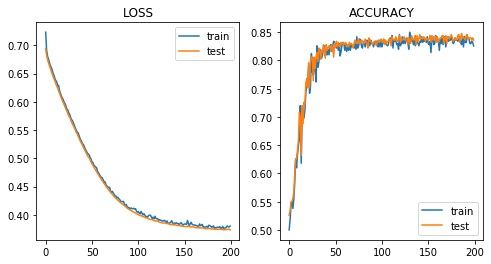

In [196]:
fig=plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title("LOSS")
plt.plot(h.history['loss'], label='train')
plt.plot(h.history['val_loss'], label='test')
plt.legend()
plt.subplot(122)
plt.title("ACCURACY")
plt.plot(h.history['accuracy'], label='train')
plt.plot(h.history['val_accuracy'], label='test')
plt.legend()
plt.show()

## Hinge Loss

In [197]:
y[where(y==0)]= -1

In [204]:
X,y = make_circles(n_samples=1000, noise=0.1, random_state=1)
y[where(y==0)]= -1

In [206]:
n_train=500
trainX,testX= X[:n_train,:],X[n_train:,:]
trainy,testy=y[:n_train],y[n_train:]

In [212]:
model=Sequential()
model.add(Dense(50,input_dim=2,activation='relu',
               kernel_initializer='he_uniform'))
model.add(Dense(1, activation='tanh'))
opt=SGD(lr=0.01, momentum=0.9)
model.compile(loss='hinge', optimizer=opt,metrics=['accuracy'])

In [213]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 50)                150       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 51        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
h=model.fit(trainX,trainy,validation_data=(testX,testy),
           epochs=200,
           verbose=1)

In [59]:
model.metrics_names

['loss', 'accuracy']

In [60]:
_,train_acc=model.evaluate(trainX,trainy, verbose=1)

500/500 [==============================] - 0s 21us/step


In [61]:
_,test_acc=model.evaluate(testX,testy, verbose= 1)

500/500 [==============================] - 0s 19us/step


In [62]:
print('Train: {:.4f} Test: {:.4f}'.format(train_acc, test_acc))

Train: 0.8380 Test: 0.8380


In [63]:
h.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

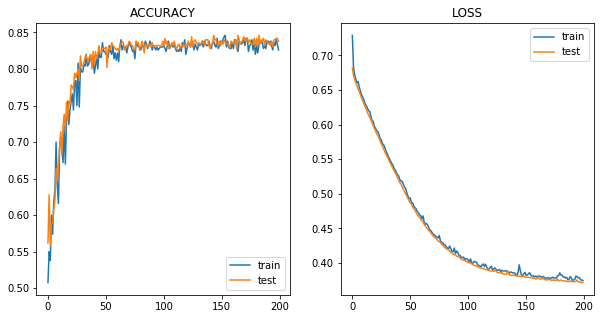

In [64]:
fig =plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('ACCURACY')
plt.plot(h.history['accuracy'], label='train')
plt.plot(h.history['val_accuracy'], label = 'test')
plt.legend()
plt.subplot(1,2,2)
plt.title("LOSS")
plt.plot(h.history['loss'], label='train')
plt.plot(h.history['val_loss'], label='test')
plt.legend()
plt.show()

## Squared Hinge Loss

In [65]:
X,y = make_circles(n_samples=1000, noise=0.1, random_state=1)
y[where(y==0)]= -1

In [66]:
n_train=500
trainX,testX = X[:n_train,:],X[n_train:,:]
trainy,testy=y[:n_train],y[n_train:]

In [ ]:
collapse-hide
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='tanh'))
opt=SGD(lr=0.01, momentum=0.9)
model.compile(loss='squared_hinge', optimizer=opt, metrics=['accuracy'])
h = model.fit(trainX,trainy,validation_data=(testX,testy), epochs=200, verbose=1)

In [68]:
print(model.metrics_names)
res_train = model.evaluate(trainX,trainy)
res_test = model.evaluate(testX, testy)

['loss', 'accuracy']
500/500 [==============================] - 0s 18us/step


In [261]:
print('Traina cc:{:.4f}  Test acc:{:.4f}'.format(res_train[1], res_test[1]))

Traina cc:0.6820  Test acc:0.6660


In [262]:
h.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

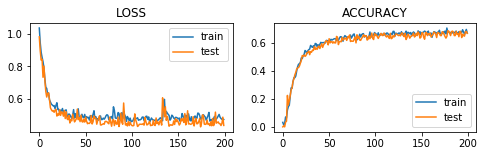

In [263]:
fig=plt.figure(figsize=(8,2))
plt.subplot(121)
plt.title("LOSS")
plt.plot(h.history['loss'], label='train')
plt.plot(h.history['val_loss'], label='test')
plt.legend()
plt.subplot(122)
plt.title("ACCURACY")
plt.plot(h.history['accuracy'], label='train')
plt.plot(h.history['val_accuracy'], label='test')
plt.legend()
plt.show()

##  Multi-class classification
### Multi-class cross-entropy

In [282]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000, centers=3, n_features=2,
                cluster_std=2, random_state=2)

In [283]:
print(X[:5], '  ', y[:5])

[[  0.48719811  -0.43160548]
 [ -1.48958879  -3.47915742]
 [ -2.06250444  -7.73300419]
 [ -0.51369303 -10.31546366]
 [  0.56240126  -2.18246169]]    [2 2 2 0 1]


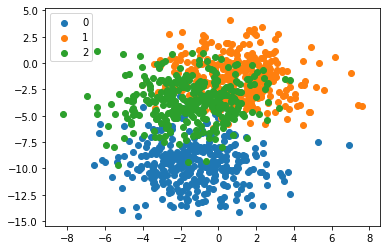

In [285]:
for i in range(3):
    samples_idx = where(y==i)
    plt.scatter(X[samples_idx,0], X[samples_idx,1], label=str(i))

plt.legend()
plt.show()

In [336]:
from keras.utils import to_categorical
X,y = make_blobs(n_samples=1000, centers=3, n_features=2,
                cluster_std=2, random_state=2)

y = to_categorical(y) #NO ONEHOT ENCODING FOR SPARSE

n_train=500
trainX,testX = X[:n_train,:],X[n_train:,:]
trainy,testy=y[:n_train],y[n_train:]

In [339]:
print(trainy.shape)
print(y[:5])

(500, 3)
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [ ]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
opt=SGD(lr=0.01, momentum=0.9)
#model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=opt,
             metrics=['accuracy'], )
h = model.fit(trainX,trainy,validation_data=(testX,testy), epochs=200, verbose=1)

In [342]:
model.metrics_names

['loss', 'accuracy']

In [343]:
res_train = model.evaluate(trainX,trainy)
res_test = model.evaluate(testX, testy)
print('Train acc:{:.4f}  Test acc:{:.4f}'.format(res_train[1], res_test[1]))

500/500 [==============================] - 0s 33us/step
Train acc:0.8320  Test acc:0.8260


In [344]:
h.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

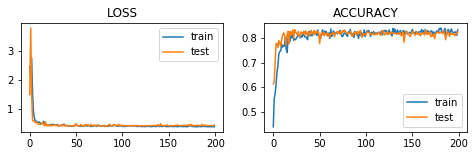

In [345]:
#collapse-hide
fig=plt.figure(figsize=(8,2))
plt.subplot(121)
plt.title("LOSS")
plt.plot(h.history['loss'], label='train')
plt.plot(h.history['val_loss'], label='test')
plt.legend()
plt.subplot(122)
plt.title("ACCURACY")
plt.plot(h.history['accuracy'], label='train')
plt.plot(h.history['val_accuracy'], label='test')
plt.legend()
plt.show()

### Sparse multi-class cross-entropy

In [349]:
from keras.utils import to_categorical
X,y = make_blobs(n_samples=1000, centers=3, n_features=2,
                cluster_std=2, random_state=2)

y = to_categorical(y) NO ONEHOT ENCODING FOR SPARSE

n_train=500
trainX,testX = X[:n_train,:],X[n_train:,:]
trainy,testy=y[:n_train],y[n_train:]

print(trainy.shape)
print(y[:5])

(500,)
[2 2 2 0 1]


In [ ]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
opt=SGD(lr=0.01, momentum=0.9)
#model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,
             metrics=['accuracy'], )
h = model.fit(trainX,trainy,validation_data=(testX,testy), epochs=200, verbose=1)

#res_train = model.evaluate(trainX,trainy)
#res_test = model.evaluate(testX, testy)
#print('Train acc:{:.4f}  Test acc:{:.4f}'.format(res_train[1], res_test[1]))


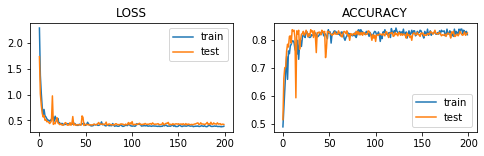

In [350]:

fig=plt.figure(figsize=(8,2))
plt.subplot(121)
plt.title("LOSS")
plt.plot(h.history['loss'], label='train')
plt.plot(h.history['val_loss'], label='test')
plt.legend()
plt.subplot(122)
plt.title("ACCURACY")
plt.plot(h.history['accuracy'], label='train')
plt.plot(h.history['val_accuracy'], label='test')
plt.legend()
plt.show()

## Kullback Leibler Divergence
Measure of how one probablity distribution differs form another
KL Div = 0 suggest dist are identical 
autoenoder used for learning dense featue representation under a model that must reconstruct the original input 

In [351]:
#collapse-hide
from sklearn.datasets import  make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [353]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2, cluster_std=2,
                 random_state=2)

In [354]:
y[:5]

array([2, 2, 2, 0, 1])

In [355]:
y = to_categorical(y)

In [356]:
y[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [357]:
n_train=500
trainX,testX = X[:n_train,:],X[n_train:,:]
trainy, testy = y[n_train:],y[:n_train]

In [359]:
#collapse-hide
model= Sequential()
model.add(Dense(50, input_dim=2, activation='relu',
               kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
opt=SGD(lr=0.01, momentum=0.9)
model.compile(loss='kullback_leibler_divergence', optimizer=opt, metrics=['accuracy'])

In [ ]:
h = model.fit(trainX ,trainy, validation_data=(testX, testy),
             epochs =100, verbose=1)

In [366]:
model.evaluate(trainX,trainy,verbose=1)

500/500 [==============================] - 0s 49us/step


[1.0587191171646118, 0.41600000858306885]

In [363]:
model.metrics_names

['loss', 'accuracy']

In [364]:
h.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

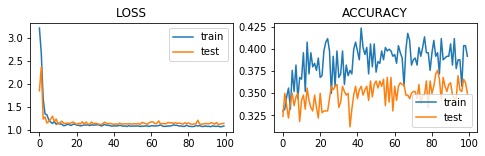

In [365]:
fig=plt.figure(figsize=(8,2))
plt.subplot(121)
plt.title("LOSS")
plt.plot(h.history['loss'], label='train')
plt.plot(h.history['val_loss'], label='test')
plt.legend()
plt.subplot(122)
plt.title("ACCURACY")
plt.plot(h.history['accuracy'], label='train')
plt.plot(h.history['val_accuracy'], label='test')
plt.legend()
plt.show()

FIN